In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from __future__ import division
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import MaxentClassifier
from sklearn.metrics import precision_recall_fscore_support
from nltk.classify.util import accuracy
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
Tweet=pd.read_csv(r'/content/drive/My Drive/Airline-Sentiment-data-set.csv',sep=',',encoding ='Latin-1')

In [0]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [0]:
trainData=[]
testData=[]
trainLabel=[]
testLabel=[]



**Returns number of words **

In [0]:
def newTweetLength(unchangedTweet):
    onlyAlphabets = re.sub("[^a-zA-Z0-9]"," ",unchangedTweet) 
    words = onlyAlphabets.lower().split()                             
    stops = set(stopwords.words("english"))                  
    refinedWords = [w for w in words if not w in stops] 
    return(len(refinedWords))


**Cleaning the Tweets using Unigram**

In [0]:
def convertToWords(unchangedTweet):
    onlyAlphabets = re.sub("[^a-zA-Z0-9]", " ",unchangedTweet) 
    words = onlyAlphabets.lower().split()                             
    stops = set(stopwords.words("english"))                  
    refinedWords = [w for w in words if not w in stops]
    return str(refinedWords) 


**Cleaning the Tweets using Bigram **

In [0]:
'''def convertToWords(unchangedTweet):
    onlyAlphabets = re.sub("[^a-zA-Z0-9]", " ",unchangedTweet) 
    words = onlyAlphabets.lower().split()                             
    stops = set(stopwords.words("english"))                  
    refinedWords = [w for w in words if not w in stops]
    bigramFeatureVector=[]
    for item in nltk.bigrams(refinedWords):
        bigramFeatureVector.append(' '.join(item))
    return str(bigramFeatureVector) '''

**Cleaning the Tweets using Trigram**

In [0]:
'''def convertToWords(unchangedTweet):
    onlyAlphabets = re.sub("[^a-zA-Z0-9]", " ",unchangedTweet) 
    words = onlyAlphabets.lower().split()                             
    stops = set(stopwords.words("english"))                  
    refinedWords = [w for w in words if not w in stops]
    trigramFeatureVector=[]
    for item in nltk.trigrams(refinedWords):
        trigramFeatureVector.append(' '.join(item))
    return str(trigramFeatureVector) '''

In [0]:
Tweet['label']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative'else 1)
label=Tweet['label'].tolist()
Tweet=Tweet.drop('airline_sentiment',axis=1)


**Parsing through Dataset and creating Dictonary**

In [0]:
def parse(dataset1):
  return(dataset1[11])

r,c=Tweet.shape
dataset=list(Tweet.values)

data_list=[]
for i in range(r):
  data={}
  id12=parse(dataset[i])
      
  proc_data=convertToWords(f'{id12}')
                           
  len_data=newTweetLength(f'{id12}')
                          
  if proc_data not in data:
    data[proc_data]=len_data
    data_list.append(data)


**Splitting the dataset**

In [0]:
def splitData(percentage):
    dataSamples = len(data_list)
    halfOfData = int(len(data_list)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    
    for (Text) in data_list[:trainingSamples] + data_list[halfOfData:halfOfData+trainingSamples]:
        trainData.append(Text)
        
    for (t) in label[:trainingSamples] + label[halfOfData:halfOfData+trainingSamples]:
        trainLabel.append(str(t))
        
    for (Text) in data_list[trainingSamples:halfOfData] + data_list[halfOfData+trainingSamples:]:
        testData.append(Text)
        
    for (t) in label[trainingSamples:halfOfData] + label[halfOfData+trainingSamples:]:
        testLabel.append(str(t))

**Testing function**

In [0]:
def predictLabels(inputs,classifier):
  return classifier.classify_many(map(lambda t: t[0],inputs))

In [0]:
splitData(0.80)

**Joining Dictonary dataset with its Label**

In [0]:
train_data=[]
test_data=[]
train_data=np.c_[trainData,trainLabel]
test_data=np.c_[testData,testLabel]


**Training the classifier**

In [22]:
classifier = MaxentClassifier.train(train_data, 'GIS', gaussian_prior_sigma=0, max_iter = 3)

y_pred=predictLabels(test_data,classifier)
(p,r,f,_)=precision_recall_fscore_support(list(map(lambda d: d[1],test_data)),y_pred,average='macro')


print(p)
print(r)
print(f)



  ==> Training (3 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.363
             2          -0.69312        0.999
         Final          -0.69309        0.999
0.7378184391427416
0.6298701298701299
0.5285120724566339


**Calculating the accuracy**

In [23]:
accuracy = nltk.classify.util.accuracy(classifier, test_data)
print(accuracy)

0.5571209016393442


In [0]:
Test_result=[accuracy,p,r,f]


**Plotting the result**

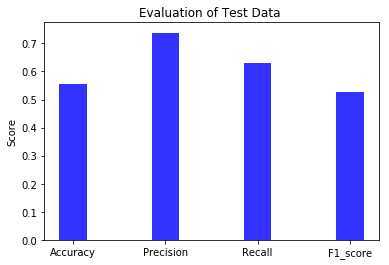

In [28]:
objects = ('Accuracy', 'Precision', 'Recall', 'F1_score')

performance = Test_result
bar_width=0.3
rects1 = plt.bar(objects, performance,bar_width ,alpha=0.8,color='b',)
 

plt.xticks(objects, objects)
plt.ylabel('Score')
plt.title('Evaluation of Test Data ')


plt.show()